1️⃣ [Soal] Setup & Import Library
- Deskripsi:
- Pada tahap ini, kamu akan mengimpor semua library Python yang dibutuhkan untuk analisis data spasial dan statistik.

Soal:

1. Import semua library yang diperlukan untuk analisis data spasial dan statistik.
2. Jelaskan fungsi utama masing-masing library!

Hint:
Gunakan pandas, geopandas, folium, matplotlib, seaborn, numpy, dan shapely.

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point

Penjelasan Fungsi Library
- pandas → manipulasi dan analisis data tabular
- geopandas → pengolahan data spasial (GeoDataFrame, GeoJSON, Shapefile)
- folium → visualisasi peta interaktif berbasis Leaflet
- matplotlib → visualisasi data dasar (plot, histogram)
- seaborn → visualisasi statistik yang lebih informatif
- numpy → operasi numerik dan array
- shapely → operasi geometri (Point, Polygon, buffer, intersection)

2️⃣ [Soal] Load Data GeoJSON
- Deskripsi:
- Baca data pluvial flood point south west Nigeria dari file GeoJSON menggunakan geopandas.

Soal:

1. Load file data_point_pluvial_flood_dataset.geojson ke dalam GeoDataFrame.
2. Tampilkan 5 baris pertama data.

Hint:
Gunakan gpd.read_file(path) dan head().

In [2]:
# Load data GeoJSON
gdf = gpd.read_file("data_point_pluvial_flood_dataset.geojson")

# Show first 5 rows
gdf.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,geometry
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,POINT (3.90944 7.44306)
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,POINT (3.90861 7.44278)
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,POINT (3.90889 7.44278)
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,POINT (3.90917 7.44278)
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,POINT (3.90944 7.44278)


Penjelasan

Data GeoJSON berhasil dibaca menjadi GeoDataFrame yang berisi:
- atribut non-spasial (Slope, Rainfall, TWI, SUSCEP, dll)
- kolom geometry bertipe Point

3️⃣ [Soal] Eksplorasi Struktur Data
- Deskripsi:
- Lakukan eksplorasi awal untuk memahami struktur dan tipe data.

Soal:

1. Tampilkan info DataFrame (kolom, tipe data, jumlah data).
2. Tampilkan statistik deskriptif untuk parameter numerik.

Hint:

Gunakan info() dan describe().

In [3]:
# Information about the GeoDataFrame
gdf.info()

# Statistical summary of the data
gdf.describe()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB


,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144401.000000,144401.000000,1.441190e+05,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000
mean,3.891534,7.374551,-2.502788e+35,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.120858e+35,219.714542,74.786932
std,0.027887,0.032459,9.225150e+36,1.682769e+37,7.543591e+36,2.686356e+36,8.492619e+36,7.057921,8.891617
min,3.831111,7.311389,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096
25%,3.868889,7.348333,5.105756e+01,-2.592000e+09,1.013099e+02,-8.654586e+00,0.000000e+00,214.286900,68.140822
50%,3.891667,7.374167,6.198023e+01,0.000000e+00,1.894623e+02,-8.006991e+00,1.000000e+00,220.631300,73.873425
75%,3.913611,7.400278,6.916712e+01,2.592000e+09,2.700000e+02,-6.709276e+00,6.000000e+00,224.191400,81.329315
max,3.954444,7.443056,8.657541e+01,3.888000e+10,3.591449e+02,1.168344e+01,4.579360e+05,235.421000,101.515616


Penjelasan
- info() → melihat jumlah data, tipe kolom, dan missing value
- describe() → ringkasan statistik (mean, min, max, std) untuk parameter numerik

Ini digunakan untuk memahami sebaran awal data flood.

4️⃣ [Soal] Visualisasi Distribusi Parameter
- Deskripsi:
- Visualisasikan distribusi beberapa parameter penting (misal: Slope, Rainfall, TWI).

Soal:

1. Buat histogram untuk parameter Slope dan Rainfall.
2. Apa yang bisa kamu simpulkan dari distribusi data tersebut?

Hint:
Gunakan sns.histplot() dan plt.show().

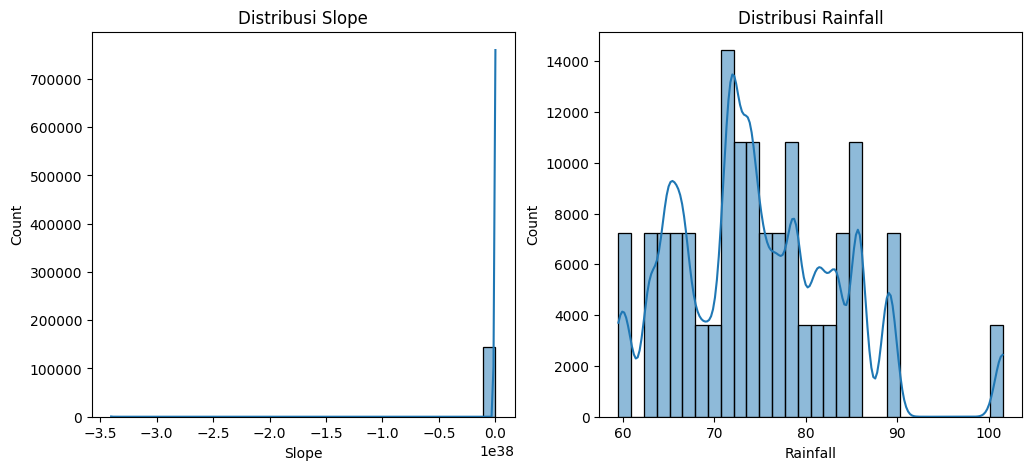

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(gdf['Slope'], bins=30, kde=True)
plt.title("Distribusi Slope")

plt.subplot(1,2,2)
sns.histplot(gdf['Rainfall'], bins=30, kde=True)
plt.title("Distribusi Rainfall")

plt.show()

Kesimpulan
- Slope cenderung terkonsentrasi pada nilai rendah → area relatif datar lebih rentan genangan
- Rainfall menunjukkan variasi cukup besar → curah hujan berperan penting dalam flood susceptibility

5️⃣ [Soal] Analisis Kategori Susceptibility
- Deskripsi:
- Analisis sebaran kategori susceptibility (SUSCEP) pada dataset.

Soal:

1. Hitung jumlah titik per kategori susceptibility.
2. Visualisasikan hasilnya dengan bar chart.

Hint:

Gunakan value_counts() dan sns.countplot().

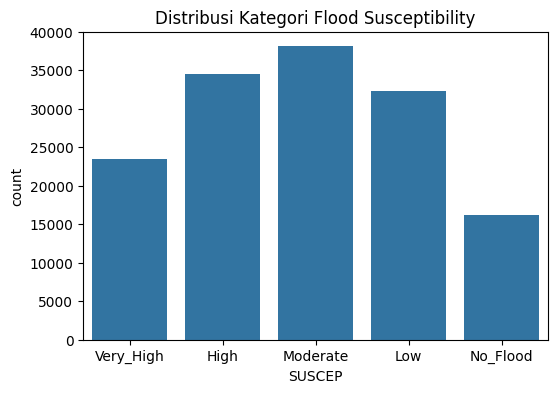

In [5]:
# Count values in SUSCEP
suscep_count = gdf['SUSCEP'].value_counts()
suscep_count

# Visualization of SUSCEP distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SUSCEP', data=gdf)
plt.title("Distribusi Kategori Flood Susceptibility")
plt.show()

Penjelasan

Analisis ini menunjukkan kategori kerentanan banjir mana yang paling dominan

6️⃣ [Soal] Scatter Plot Hubungan Parameter
- Deskripsi:
- Analisis hubungan antara dua parameter, misal Slope vs Rainfall.

Soal:

1. Buat scatter plot antara Slope dan Rainfall.
2. Apakah ada pola tertentu yang terlihat?

Hint:

Gunakan sns.scatterplot().

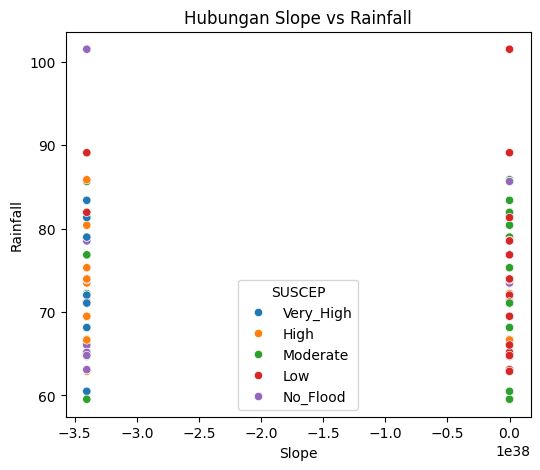

In [6]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Slope',
    y='Rainfall',
    hue='SUSCEP',
    data=gdf
)
plt.title("Hubungan Slope vs Rainfall")
plt.show()

Kesimpulan
- Tidak terlihat korelasi linear kuat
- Namun, titik dengan SUSCEP tinggi sering muncul pada kombinasi slope rendah + rainfall tinggi

7️⃣ [Soal] Heatmap Korelasi Parameter
- Deskripsi:
- Lihat korelasi antar parameter numerik pada dataset.

Soal:

1. Hitung matriks korelasi antar parameter numerik.
2. Visualisasikan dengan heatmap.

Hint:

Gunakan corr() dan sns.heatmap().

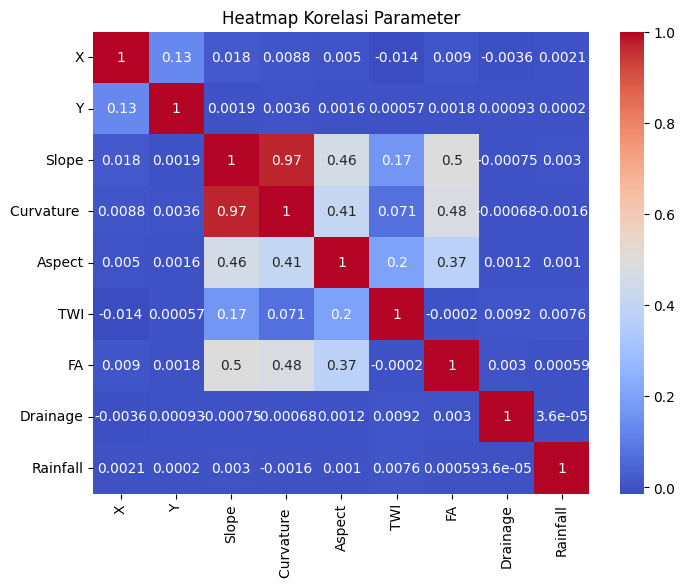

In [7]:
# Get only numeric columns
numeric_cols = gdf.select_dtypes(include=[np.number])

# Matrix korelasi
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Parameter")
plt.show()

Penjelasan

Heatmap membantu:
- Mengidentifikasi parameter yang paling berpengaruh

8️⃣ [Soal] Peta Interaktif Titik Flood
- Deskripsi:
- Pada tahap ini, kamu akan membuat peta interaktif yang hanya menampilkan sebagian kecil titik flood dari dataset (bukan seluruh data dan tanpa analisis outlier).
- Tujuannya agar peta lebih informatif, tidak terlalu padat, dan mudah dianalisis.

Soal:

1. Pilih dan filter data flood yang ingin divisualisasikan (misal: 5 titik acak dari seluruh dataset).
2. Buat peta interaktif yang hanya menampilkan titik-titik hasil filter.
3. Tambahkan popup/tooltip pada setiap marker yang menampilkan nilai susceptibility dan parameter penting (misal: Slope, Rainfall, TWI).
4. Simpan peta sebagai file HTML dan pastikan bisa dibuka di browser.

Hint:

1. Gunakan metode filter DataFrame seperti .sample(n) untuk mengambil n titik acak.
2. Gunakan folium.Map(), folium.Marker(), dan folium.Popup() untuk visualisasi.
3. Simpan peta dengan m.save('nama_file.html').

In [8]:
sample_gdf = gdf.sample(n=5, random_state=42)

# Create a centroid of the sample points
center = [sample_gdf.geometry.y.mean(), sample_gdf.geometry.x.mean()]

m = folium.Map(location=center, zoom_start=7)

for _, row in sample_gdf.iterrows():
    popup_text = f"""
    <b>SUSCEP:</b> {row['SUSCEP']}<br>
    <b>Slope:</b> {row['Slope']}<br>
    <b>Rainfall:</b> {row['Rainfall']}<br>
    <b>TWI:</b> {row['TWI']}
    """
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=popup_text
    ).add_to(m)

# Save map to HTML
m.save("flood_sample_map.html")

Hasil
- Peta hanya menampilkan 5 titik flood
- Setiap marker memiliki popup informatif